# Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_rows", None)

In [2]:
# Aquí se pone la ruta de acceso a la data para su lectura

propiedades = r"C:\Users\mared\Desktop\Fallabella_inmoviliario\raw_sales.csv"
propiedades = pd.read_csv(propiedades)
propiedades.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [3]:
# Vemos el tipo de formato que tienen los datos en las columnas, notamos que la columna perteneciente a fecha tiene un formato de objeto

propiedades.dtypes

datesold        object
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object

In [4]:
# Aplicamos esta transformación a la columna 'datesold' para cambiarla a formato date time

propiedades['datesold'] = pd.to_datetime(propiedades['datesold'],format='%Y/%m/%d')

# Agrego columna que contenga sólo el año, para así poder agrupar más fácil
propiedades['año'] = propiedades['datesold'].dt.strftime('%Y')

propiedades['año'] = propiedades['año'].astype(str).astype(int)

In [5]:
# Ahora vemos que tiene el formato que buscamos

propiedades.dtypes

datesold        datetime64[ns]
postcode                 int64
price                    int64
propertyType            object
bedrooms                 int64
año                      int32
dtype: object

In [6]:
# Nos aseguramos que la base no contenga valores nulos

propiedades.isnull().sum()

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
año             0
dtype: int64

## **Pregunta 1**

### A) Clasificar según precio si la propiedad es barata o cara, aplicando la etiqueta en una nueva columna

In [7]:
# Generamos la nueva columna, cuyos valores son todos 'Cara'
propiedades['cara_barata'] = 'Cara'

# Creamos la regla que determina si una propiedad es 'Barata', esto en base al precio
barata = propiedades.price < 600000

# Buscamos dentro de la base todas las filas que cumplan con la regla creada anteriormente, todas las que cumplan, se reemplaza el valor por defecto de la columna nueva 'cara_barata'
# Por el valor 'Barata'
propiedades['cara_barata'].loc[barata] = 'Barata'

# Se extrae una muestra aleatoria de la base para ver que lo requerido fue aplicado correctamente
propiedades.sample(10)

,datesold,postcode,price,propertyType,bedrooms,año,cara_barata
4340,2011-09-14,2611,522000,house,3,2011,Barata
16597,2016-11-19,2615,651000,house,4,2016,Cara
4773,2012-01-05,2913,425000,house,3,2012,Barata
25775,2014-03-19,2913,282500,unit,1,2014,Barata
7779,2013-10-18,2914,555000,house,4,2013,Barata
22771,2018-09-12,2615,550000,house,3,2018,Barata
22220,2018-06-25,2611,675000,house,3,2018,Cara
15102,2016-05-28,2607,790000,house,4,2016,Cara
14771,2016-04-23,2913,595000,house,4,2016,Barata
19771,2017-10-21,2615,620000,house,4,2017,Cara


### B) Elaborar método para que cada vez que se agregue una propiedad a la base original, esta se clasifique automaticamente

#### Respuesta: Con el código que responde la pregunta A) todas las propiedades agregadas a la base original quedarán clasificadas automaticamente al cargar la base en este script

In [8]:
# Ordenamos la data por fecha para luego exportarla

propiedades = propiedades.sort_values('datesold',ascending=True)

In [9]:
# Exportación de la base

propiedades.to_excel(r"C:\Users\mared\Desktop\Fallabella_inmoviliario\base_tratada.xlsx", index=False)

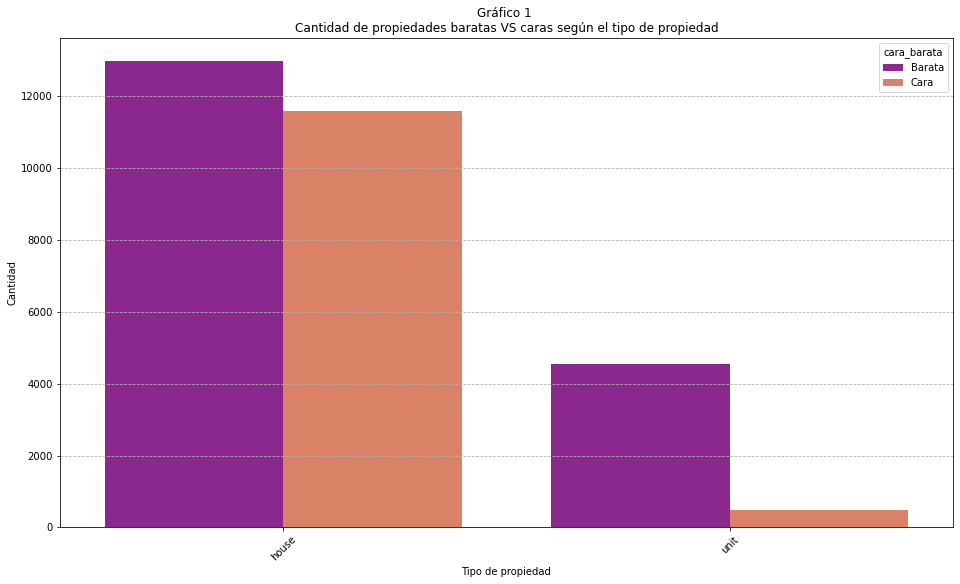

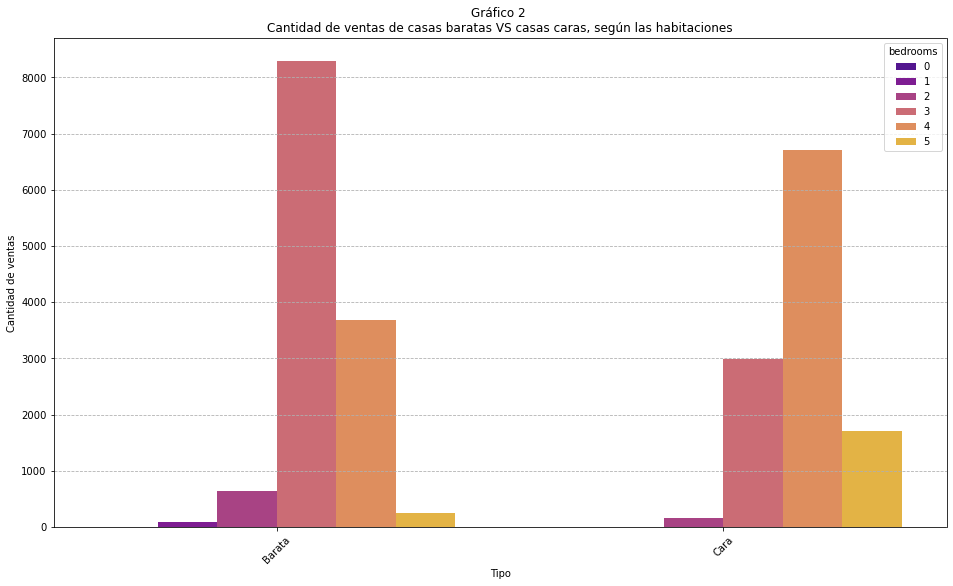

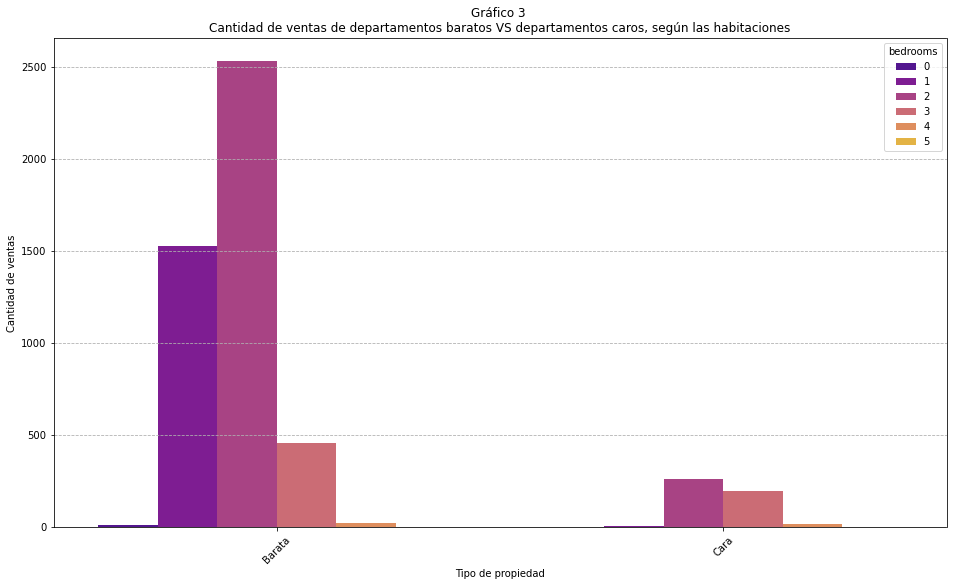

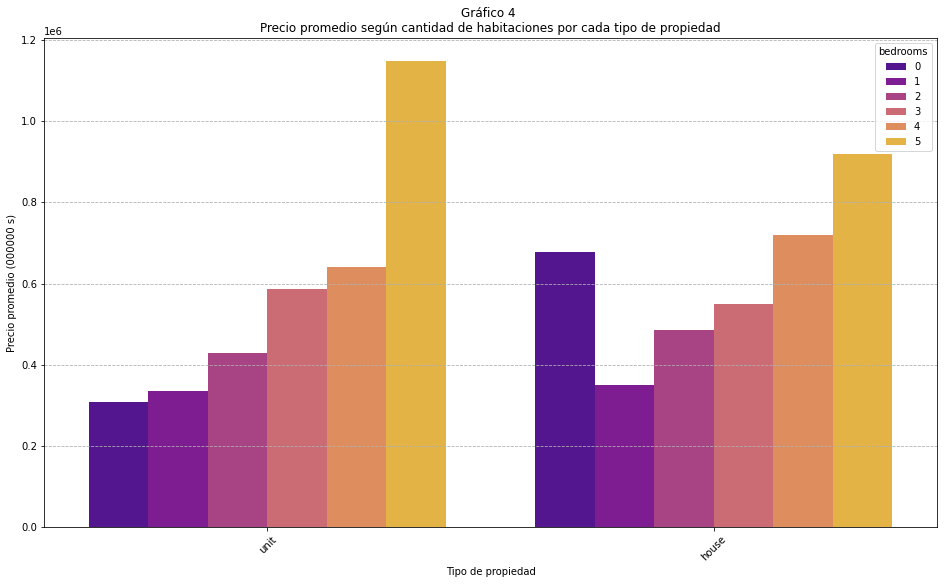

In [10]:
# Generamos gráfico que nos muestre la cantidad de propiedades baratas VS caras según su si es house o unit
propiedades_cara_barata_count = propiedades.groupby(['propertyType','cara_barata'])['price'].agg('count').reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=propiedades_cara_barata_count, x='propertyType', y='price', hue='cara_barata', palette='plasma')
plt.title('Gráfico 1 \nCantidad de propiedades baratas VS caras según el tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

# Generamos gráfico que nos muestre la cantidad de casas caras y baratas vendidas según su cantidad de habitaciones
house = propiedades[propiedades.propertyType=='house']
propiedades_house_price_count = house.groupby(['bedrooms','cara_barata'])['price'].agg('count').reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=propiedades_house_price_count, x='cara_barata', y='price', hue='bedrooms', palette='plasma')
plt.title('Gráfico 2 \nCantidad de ventas de casas baratas VS casas caras, según las habitaciones')
plt.xlabel('Tipo')
plt.ylabel('Cantidad de ventas')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

# Generamos gráfico que nos muestre la cantidad de units caras y baratas vendidas según su cantidad de habitaciones
unit = propiedades[propiedades.propertyType=='unit']
propiedades_unit_price_count = unit.groupby(['bedrooms','cara_barata'])['price'].agg('count').reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=propiedades_unit_price_count, x='cara_barata', y='price', hue='bedrooms', palette='plasma')
plt.title('Gráfico 3 \nCantidad de ventas de departamentos baratos VS departamentos caros, según las habitaciones')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Cantidad de ventas')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

# Generamos gráfico que nos muestre el precio promedio según la cantidad de habitaciones por cada tipo de propiedad
propiedades_bedrooms_price_avg = propiedades.groupby(['bedrooms','propertyType'])[['propertyType','price']].agg('mean').sort_values('price').reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=propiedades_bedrooms_price_avg, x='propertyType', y='price', hue='bedrooms', palette='plasma')
plt.title('Gráfico 4 \nPrecio promedio según cantidad de habitaciones por cada tipo de propiedad')
plt.xlabel('Tipo de propiedad')
plt.ylabel('Precio promedio (000000 s)')
plt.grid(axis = 'y', linestyle ='--')
plt.xticks(rotation='45')
plt.show()

## **Principales conclusiones**

- Gráfico 1: Podemos ver que en este periodo de tiempo, el tipo de propiedad más vendida fueron las casas. Además podemos decir que tanto para casas como departamentos, los modelos más vendidos fueron los considerados baratos. 

- Gráfico 2: Haciendo un doble click en las casas, podemos ver que las casas baratas más vendidas fueron las de 3 habitaciones, mientras que para las casas caras, las más vendidas fueron las de 4 habitaciones.

- Gráfico 3: Repitiendo el ejercicio anterior, pero ahora con los departamentos, podemos notar que tanto para los departamentos baratos como para los caros, los más vendidos fueron los de 2 habitaciones, pero teniendo una gran diferencia en cuanto a cantidad la venta de los baratos VS los caros.

- Gráfico 4: Revisando los precios promedio de venta según el tipo de propiedad y su cantidad de habitaciones podemos notar que los departamentos tienen un mayor rango de precios según sus habitaciones que las casas. También podemos notar que los precios promedios para ambos tipos de propiedad, para las tipologías de 1, 2, 3 y 4 habitaciones, son bastante similares, teniendo leves diferencias.

Cómo conclusiones generales podemos decir que las personas que han comprado casas, son usuarios que requieren de 3 o 4 habitaciones, manejando presupuestos de compra de entre 500.000 dolares a 750.000 dolares aproximadamente. Mientras que las personas que han comprado departamentos, son usuarios con un grupo familiar más reducido, ya que optan por propiedades en su mayoría de 2 habitaciones, manejando así montos de compra que en promedio están rondando los 400.000 dolares.

## **Preguntas opcionales**

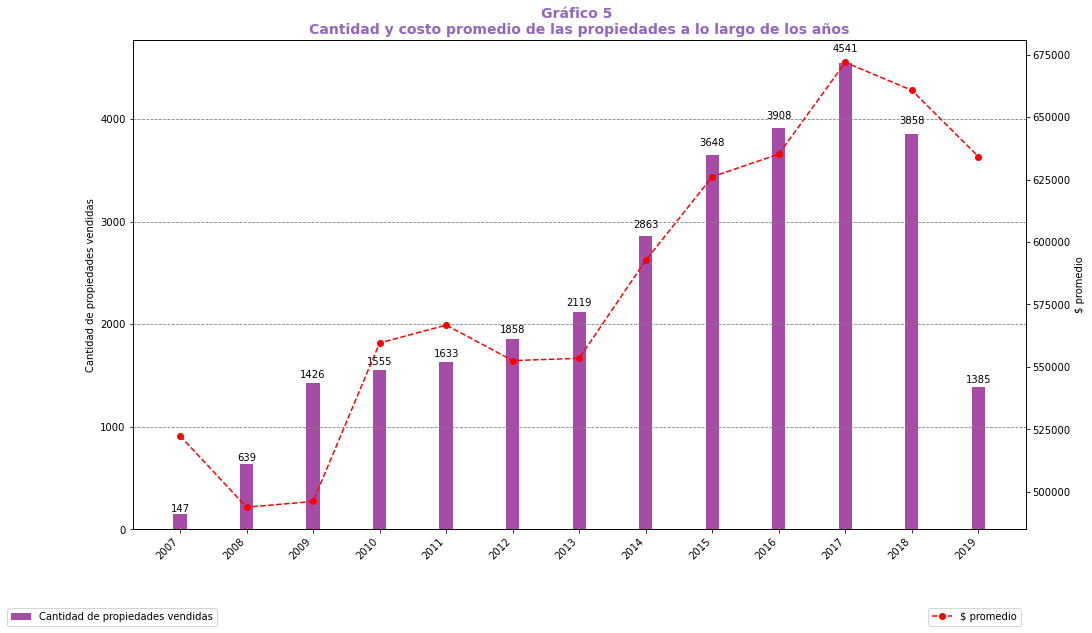

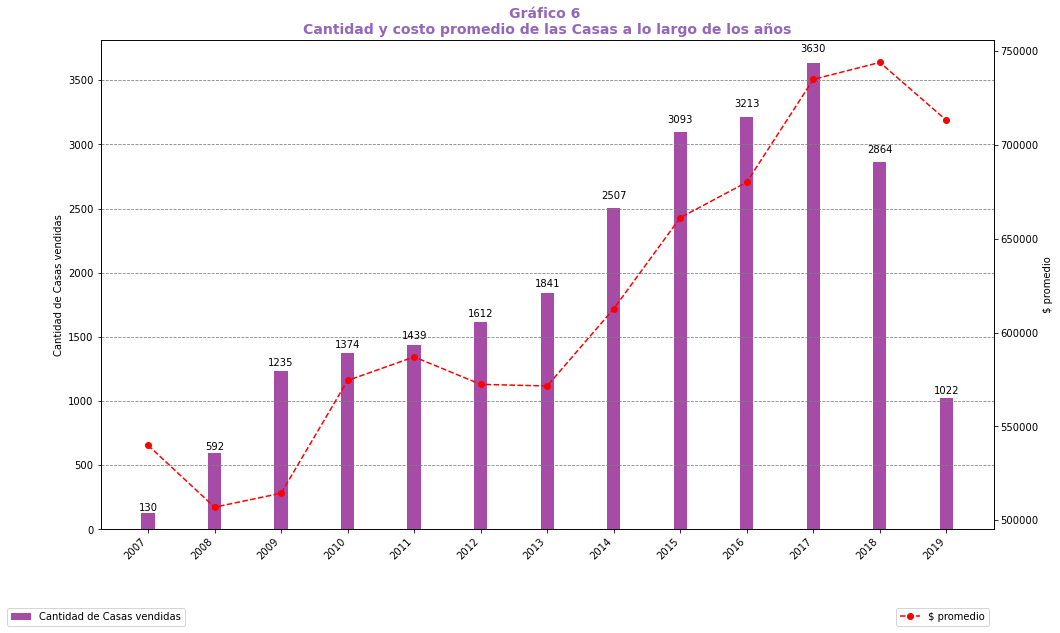

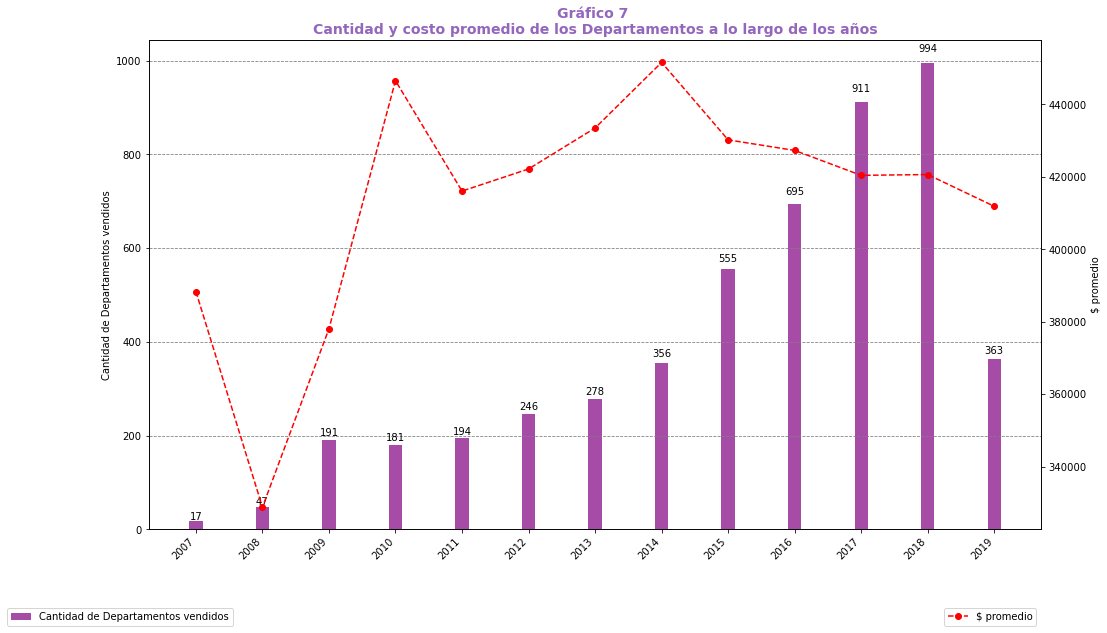

In [11]:
historico = propiedades.groupby('año')['price'].agg(['count','mean']).reset_index()
# Grafica Cantidad y costo promedio por año de la venta de propiedades

año = list(historico['año'])

q1 = list(historico['count'])

m = list(historico['mean'])

# Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(año))

# Ancho de las barras
width = 0.2

fig, ax = plt.subplots()

# Para hacer el eje compartido
ax2_share_x = ax.twinx()  
ax2_share_x.set_ylabel("$ promedio")

# Gráfico de barra
rects1 = ax.bar(x, q1, width, label='Cantidad',ls='dashed', alpha = 0.7, lw=3,color='purple')

# Gráfico de línea
ax2_share_x.plot(m, marker="o", color ="r", linestyle='dashed')

# Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Cantidad de propiedades vendidas')
ax.set_title('Gráfico 5 \nCantidad y costo promedio de las propiedades a lo largo de los años',
             loc = "center",
             fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})

ax.set_xticks(x)
ax2_share_x.set_xticks(x)
ax.set_xticklabels(año, rotation=45, ha='right')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

# Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend(["Cantidad de propiedades vendidas"] ,bbox_to_anchor = (0.1, -.15))
ax2_share_x.legend(["$ promedio"] ,bbox_to_anchor = (1, -.15))

# Función para poner las etiquetas de valores
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '%d'%int(h),ha='center', va='bottom')

# Se llama a la función que agrega las etiquetas de valores.
autolabel(rects1)

#Mostramos la grafica con el metodo show()
fig.set_size_inches(16, 9)
plt.show()


# Grafica Cantidad y costo promedio por año de la venta de Casas
historico_casas = house.groupby('año')['price'].agg(['count','mean']).reset_index()

año_c = list(historico_casas['año'])

q1_c = list(historico_casas['count'])

m_c = list(historico_casas['mean'])

# Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(año_c))

# Ancho de las barras
width = 0.2

fig, ax = plt.subplots()

# Para hacer el eje compartido
ax2_share_x = ax.twinx()  
ax2_share_x.set_ylabel("$ promedio")

# Gráfico de barra
rects1 = ax.bar(x, q1_c, width, label='Cantidad',ls='dashed', alpha = 0.7, lw=3,color='purple')

# Gráfico de línea
ax2_share_x.plot(m_c, marker="o", color ="r", linestyle='dashed')

# Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Cantidad de Casas vendidas')
ax.set_title('Gráfico 6 \nCantidad y costo promedio de las Casas a lo largo de los años',
             loc = "center",
             fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})

ax.set_xticks(x)
ax2_share_x.set_xticks(x)
ax.set_xticklabels(año_c, rotation=45, ha='right')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

# Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend(["Cantidad de Casas vendidas"] ,bbox_to_anchor = (0.1, -.15))
ax2_share_x.legend(["$ promedio"] ,bbox_to_anchor = (1, -.15))

# Función para poner las etiquetas de valores
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '%d'%int(h),ha='center', va='bottom')

# Se llama a la función que agrega las etiquetas de valores.
autolabel(rects1)

#Mostramos la grafica con el metodo show()
fig.set_size_inches(16, 9)
plt.show()



# Grafica Cantidad y costo promedio por año de la venta de Departamentos
historico_departamentos = unit.groupby('año')['price'].agg(['count','mean']).reset_index()

año_d = list(historico_departamentos['año'])

q1_d = list(historico_departamentos['count'])

m_d = list(historico_departamentos['mean'])

# Obtenemos la posicion de cada etiqueta en el eje de X
x = np.arange(len(año_d))

# Ancho de las barras
width = 0.2

fig, ax = plt.subplots()

# Para hacer el eje compartido
ax2_share_x = ax.twinx()  
ax2_share_x.set_ylabel("$ promedio")

# Gráfico de barra
rects1 = ax.bar(x, q1_d, width, label='Cantidad',ls='dashed', alpha = 0.7, lw=3,color='purple')

# Gráfico de línea
ax2_share_x.plot(m_d, marker="o", color ="r", linestyle='dashed')

# Añadimos las etiquetas de identificacion de valores en el grafico
ax.set_ylabel('Cantidad de Departamentos vendidos')
ax.set_title('Gráfico 7 \nCantidad y costo promedio de los Departamentos a lo largo de los años',
             loc = "center",
             fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})

ax.set_xticks(x)
ax2_share_x.set_xticks(x)
ax.set_xticklabels(año_d, rotation=45, ha='right')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')

# Añadimos un legen() esto permite mmostrar con colores a que pertence cada valor.
ax.legend(["Cantidad de Departamentos vendidos"] ,bbox_to_anchor = (0.1, -.15))
ax2_share_x.legend(["$ promedio"] ,bbox_to_anchor = (1, -.15))

# Función para poner las etiquetas de valores
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '%d'%int(h),ha='center', va='bottom')

# Se llama a la función que agrega las etiquetas de valores.
autolabel(rects1)

#Mostramos la grafica con el metodo show()
fig.set_size_inches(16, 9)
plt.show()

### Conclusiones gráficos extra

**Nota: Para el año 2019 no se cuenta con toda la data,ya que llega hasta el mes de julio, por eso se ve esa disminución abrupta en la cantidad y el costo promedio** 

- Gráfico 5: Muestra la evolución historica de la cantidad de Propiedades vendidas y sus costes promedio. Podemos notar una alza sostenida hasta el año 2018.

- Gráfico 6: Muestra la evolución historica de la cantidad de Casas vendidas y sus costes promedio. Podemos notar que su comportamiento es similar al total de propiedades (Porque la cantidad total de casas es mayor a los departamentos).

- Gráfico 7: Muestra la evolución historica de la cantidad de Departamentos vendidos y sus costes promedio. Aquí podemos ver una tendencia al alza en la cantidad de departamentos vendidos, mientras que el costo promedio los primeros años era elevado, luego del 2015 en adelante este coste promedio empieza a ajustarse, tendiendo a bajar.

### Regresión Lineal

In [12]:
# Creamos variables dummies para propertyType, ya que al ser una variable categórica nos combiene transformarla a número para incorporarla al modelo
dummies = pd.get_dummies(propiedades.propertyType)
propiedades= pd.concat([propiedades, dummies], axis=1)
propiedades.head()

,datesold,postcode,price,propertyType,bedrooms,año,cara_barata,house,unit
0,2007-02-07,2607,525000,house,4,2007,Barata,1,0
1,2007-02-27,2906,290000,house,3,2007,Barata,1,0
2,2007-03-07,2905,328000,house,3,2007,Barata,1,0
3,2007-03-09,2905,380000,house,4,2007,Barata,1,0
4,2007-03-21,2906,310000,house,3,2007,Barata,1,0


In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree

In [14]:
# Identificamos nuestras variables independientes
variables_independientes = ['postcode','bedrooms','house','unit','año']

# Identificamos nuestra variable objetivo
variable_dep = 'price'

X = propiedades[variables_independientes]
y = propiedades[variable_dep]

In [15]:
# Elegimos el modelo, en este caso una regresión lineal
modelo = LinearRegression()

# Ajustamos el modelo
modelo.fit(X,y)

# Sacamos las predicciones y las agregamos a la tabla original para poder comparar
propiedades['predicciones'] = modelo.predict(X)

In [16]:
# Muestra aleatoria para ver las predicciones

propiedades.sample(10)

,datesold,postcode,price,propertyType,bedrooms,año,cara_barata,house,unit,predicciones
16831,2016-12-09,2602,1000000,house,3,2016,Cara,1,0,668252.224491
736,2009-01-12,2903,418000,house,3,2009,Barata,1,0,375647.195124
3617,2011-03-21,2617,639950,house,4,2011,Cara,1,0,723157.623377
18981,2017-08-02,2611,735000,house,4,2017,Cara,1,0,841354.856189
14363,2016-03-12,2914,660000,house,4,2016,Cara,1,0,662737.311124
24368,2019-06-29,2614,695000,house,3,2019,Cara,1,0,719457.562440
9332,2014-06-26,2612,799000,house,3,2014,Cara,1,0,624643.398377
17463,2017-02-27,2913,460000,house,3,2017,Barata,1,0,523771.571392
14274,2016-03-03,2606,695000,house,3,2016,Cara,1,0,666147.350236
15472,2016-07-23,2603,1885000,house,3,2016,Cara,1,0,667726.005927


In [17]:
y_pred_r = modelo.predict(X)
print('El modelo con esta regresión lineal tiene una desviación de más menos ${:,.0f}'.format(np.sqrt(metrics.mean_squared_error(y,y_pred_r))))

El modelo con esta regresión lineal tiene una desviación de más menos $227,857


### Árboles de Decisión

In [18]:
# Elegimos el modelo, en este caso una regresión basada en arboles de decisión
arbol = tree.DecisionTreeRegressor().fit(X,y)

# Sacamos las predicciones y las agregamos a la tabla original para poder comparar
propiedades['predicciones_arbol'] = arbol.predict(X)

# Muestra aleatoria para ver las predicciones

propiedades.sample(10)

,datesold,postcode,price,propertyType,bedrooms,año,cara_barata,house,unit,predicciones,predicciones_arbol
12763,2015-09-18,2615,590000,house,5,2015,Barata,1,0,959568.619992,6.187353e+05
24595,2008-10-23,2606,313000,unit,2,2008,Barata,0,1,328418.589893,3.094000e+05
10453,2014-11-26,2905,400000,house,3,2014,Barata,1,0,470461.359187,4.264440e+05
5127,2012-03-31,2611,450000,house,3,2012,Barata,1,0,586822.976464,4.911774e+05
6754,2013-04-04,2914,660000,house,4,2013,Cara,1,0,605217.350409,6.056062e+05
18970,2017-07-31,2615,741000,house,4,2017,Cara,1,0,839249.981934,6.446345e+05
27766,2017-07-07,2612,365000,unit,1,2017,Barata,0,1,339155.882121,3.666826e+05
20790,2018-02-02,2603,1160000,house,3,2018,Cara,1,0,706072.646404,1.321000e+06
6403,2013-01-11,2904,559000,house,4,2013,Barata,1,0,610479.536047,5.985137e+05
21187,2018-03-10,2904,705000,house,4,2018,Cara,1,0,706346.137238,7.100634e+05


In [19]:
# Revisamos la importancia que el modelo le asigna a las variables

sorted(zip(arbol.feature_importances_,variables_independientes),reverse=True)

[(0.4629971404464612, 'postcode'),
 (0.38622701429507666, 'bedrooms'),
 (0.13081052007641528, 'año'),
 (0.016661447285822865, 'unit'),
 (0.0033038778962240596, 'house')]

In [20]:
y_pred_a = arbol.predict(X)
print('El modelo con esta regresión basada en arboles de decisión tiene una desviación de más menos ${:,.0f}'.format(np.sqrt(metrics.mean_squared_error(y,y_pred_a))))

El modelo con esta regresión basada en arboles de decisión tiene una desviación de más menos $155,687


### **Conclusiones modelos de regresión**

Podemos ver gracias al algoritmo de arboles de decisión, que variables tienen más peso para el modelo a la hora de predecir el precio. La variable que más pesa es la de código postal y hace sentido, ya que la ubicación de una propiedad influye de forma importante en el valor de esta. Otra variable importante es la cantidad de habitaciones, esto se explica porque a más habitaciones, más metros cuadrados se ocupan, por ende es más caro. El año influye en el precio de las propiedades debido a variables macroeconómicas, lo que encarece el coste de la vida, por tanto, de las propiedades. Vemos que las variables de casa o departamento son las que menos influyen para este modelo a la hora de determinar el precio.

In [21]:
# Exportación de la base final, considerando las predicciones estimadas

propiedades.to_excel(r"C:\Users\mared\Desktop\Fallabella_inmoviliario\base_predicciones.xlsx", index=False)